# 1. 初始準備

In [ ]:
%env KERAS_BACKEND = tensorflow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 2. 讀入MNIST資料庫

### 2.1由Keras 讀入MNIST

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

## 2.2輸入格式整理
如果你還記得，我們每筆輸入資料都是28*28的array(陣列)，CNN 其實就是吃「圖」的（吃矩陣），所以不用像之前一樣把每筆資料都拉平拉成1*784。
但是！平常的圖有R, G, B三個channels，每個Channel 都是一個矩陣，也就是一張圖可能使用三個矩陣！我們是灰階，也就是只有一個Channel，
這件事我們也要輸入告訴keras。

### 也就是說我們要輸入的資料形式是(28,28,1)

In [5]:
x_train = x_train.reshape(60000, 28, 28,1) ##用Reshape 來整理形狀, 只有一個channel
x_test = x_test.reshape(10000,28,28,1)

In [6]:
x_train[9487].shape

(28, 28, 1)

In [7]:
x = x_train[9487][:,:,0] ##只有一個cahnnel 所以用0

In [8]:
x

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
x.shape

(28, 28)

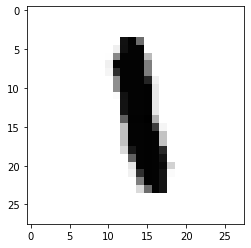

In [10]:
plt.imshow(x, cmap='Greys')

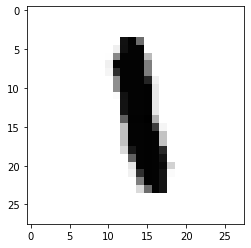

In [11]:
plt.imshow(x_train[9487], cmap='Greys')

In [34]:
x_train.shape

(60000, 28, 28, 1)

## 2.3輸出格式整理
和上次一樣，我們用標準1-hot encoding方式整理

In [12]:
from keras.utils import np_utils 

In [13]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# 3. 打造你的CNN

## 3.1 決定神經網路架構、讀入相關套件
CNN 我們一樣要決定用幾層的CNN，然後不是每次都要做max-pooling。再來就是拉平、送入標準神經網路（再度要決定幾層、幾個神經元）
1. 做3次convolution，每次都接max-pooling
2. filter 大小都是3*3，max-pooling 都用2*2為一小區塊

CNN 一個小技巧是每層的filter 數目越來越多。做完convolution 之後，我們要拉平、再輸入一個神經網路。這個神經網路設計是醬：
1. 只有一個隱藏層，使用200個神經元。

In [14]:
from keras.models import Sequential ##sequentials 是開一個空白的神經網路
from keras.layers import Dense, Activation, Flatten ##Flatten 是我們CNN做完後，會出現好多個小矩陣
                                                    ## 我們要把這些小矩陣拉成一整根向量，就可以送進Dense 層
from keras.layers import Conv2D, MaxPooling2D ##也有3D，在RGB 三原色時需要
from keras.optimizers import SGD

## 3.2 建構我們的神經網路
一開始一樣式打開一個空白的神經網路

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1))) ## 要說filter 個數多少, 跟神經元一樣，經驗說話
model.add(Activation('relu'))
## model.add(Conv2D(filter個數, (filter大小), padding = 'same'(輸出的大小要一樣，也就是外圍補零), input_shape= 輸入的樣式)

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Conv2D(64, (3,3), padding='same')) ## 這邊不用跟他說input 的樣式
model.add(Activation('relu'))

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Conv2D(128, (3,3), padding='same')) ## 這邊不用跟他說input 的樣式
model.add(Activation('relu'))

In [23]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [24]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [25]:
model.add(Dense(10))
model.add(Activation('softmax'))

## 3.3 組裝
和之前不太一樣的是我們還要做compile 才正式把我們的神經網路建好

In [26]:
model.compile(loss = 'mse', optimizer = SGD(learning_rate = 0.05), metrics = ['accuracy'])

## 3.4 檢視我們的神經網路

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

3*3*32 = 288 

why 320?

(3*3+1) = 320(+bias)

每一個filter 都有一個bias，才送進Activation Function(再送進relu Activation)，每一個filter都固定加一樣的數字

# 4. 訓練

In [35]:
model.fit(x_train, y_train, batch_size=100,epochs=12)##每看100次重調一次參數, epochs這60000筆要訓練幾次

Epoch 1/12
600/600 [==============================] - 64s 107ms/step - loss: 0.1775 - accuracy: 0.1124
Epoch 2/12
600/600 [==============================] - 67s 111ms/step - loss: 0.1775 - accuracy: 0.1124
Epoch 3/12
600/600 [==============================] - 66s 109ms/step - loss: 0.1775 - accuracy: 0.1124
Epoch 4/12
600/600 [==============================] - 64s 107ms/step - loss: 0.1775 - accuracy: 0.1124
Epoch 5/12
600/600 [==============================] - 65s 108ms/step - loss: 0.1775 - accuracy: 0.1124
Epoch 6/12
600/600 [==============================] - 64s 107ms/step - loss: 0.1775 - accuracy: 0.1124
Epoch 7/12
600/600 [==============================] - 64s 107ms/step - loss: 0.1775 - accuracy: 0.1124
Epoch 8/12
600/600 [==============================] - 65s 108ms/step - loss: 0.1775 - accuracy: 0.1124
Epoch 9/12
600/600 [==============================] - 65s 108ms/step - loss: 0.1775 - accuracy: 0.1124
Epoch 10/12
600/600 [==============================] - 65s 108ms/step - l

# 5. 結果測試
## 5.1 分數

In [29]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 9ms/step - loss: 0.1773 - accuracy: 0.1135


In [30]:
print('loss:',score[0])
print('accuracy:',score[1])

loss: 0.1773000806570053
accuracy: 0.11349999904632568


## 5.2 儲存結果（雖然很爛）


In [31]:
model_json = model.to_json()
open('handweting_model_cnn.json','w').write(model_json)
model.save_weights('handwriting_weights_cnn.h5')

## 5.3 欣賞結果

In [32]:
predict = model.predict_classes(x_test)

/Users/alexsmacbookair/opt/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


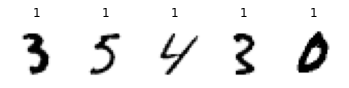

In [33]:
pick = np.random.randint(1,9999,5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")